In [9]:
# Lietz, Haiko (2020). Elite families: Multiplex ties in Renaissance Florence. Version 0.91 (14.09.2020). compsoc – Notebooks for Computational Sociology. GESIS. url:github.com/gesiscss/compsoc

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import scipy as sp

In [3]:
domains = pd.read_csv(path + 'domains.txt',sep = '\t')
families = pd.read_csv(path + 'families.txt', sep = '\t')
parties = pd.read_csv(path + 'parties.txt',sep = '\t')
relations = pd.read_csv(path + 'relations.txt',sep = '\t')

In [4]:
domains

,domain_id,domain
0,0,Marriage
1,1,Economic
2,2,Political
3,3,Friendship


In [27]:
relations.head()
#These are the marriage relationship.

,family_id_from,family_id_to,weight,domain_id
0,0,1,1,0
1,0,23,1,0
2,2,0,1,0
3,3,4,1,0
4,5,3,1,0


In [28]:
relations[relations['domain_id'] == 0].head()
#Marriage Ties

,family_id_from,family_id_to,weight,domain_id
0,0,1,1,0
1,0,23,1,0
2,2,0,1,0
3,3,4,1,0
4,5,3,1,0


In [16]:
relations[relations['domain_id'] == 1].head()
#Economic Ties

,family_id_from,family_id_to,weight,domain_id
30,0,3,3,1
31,0,8,1,1
32,0,12,2,1
33,1,26,1,1
34,2,19,1,1


In [29]:
relations[relations['domain_id'] == 2].head()
#Political Ties

,family_id_from,family_id_to,weight,domain_id
62,0,1,1,2
63,0,2,1,2
64,0,3,1,2
65,0,6,1,2
66,0,8,1,2


In [18]:
relations[relations['domain_id'] == 3].head()
#Friendship Ties

,family_id_from,family_id_to,weight,domain_id
75,0,2,1,3
76,0,23,1,3
77,2,0,1,3
78,2,20,1,3
79,12,16,1,3


In [30]:
families.head(10)

,family_id,family,party_id,gross_wealth_mean,date_of_first_prior_mean,block_size,numbers_active_medici,numbers_active_oligarch,numbers_active_neutral,pos_x,pos_y,partisanship_color,status_color
0,0,MEDICI,0,82702,1318,3,7,0,0,-0.0776,0.0391,#387db8,#b6b6b6
1,1,TORNABUONI,0,42840,1303,7,8,1,1,0.0776,0.1251,#5c82b0,#d4d4d4
2,2,GUICCIARDINI,0,40617,1289,5,6,0,0,-0.1761,-0.0705,#387db8,#f1f1f1
3,3,GINORI,0,21167,1344,2,11,0,0,-0.2381,0.1034,#387db8,#818181
4,4,DIETISALVI,0,13137,1340,2,3,0,0,-0.4000,0.1282,#387db8,#898989
5,5,DALL'ANTELLA,0,18957,1291,2,2,2,0,-0.3270,0.2273,#8c4c6b,#ededed
6,6,ORLANDINI,0,8158,1407,2,2,0,0,-0.0405,0.1715,#387db8,#000000
7,7,DAVANZATI,0,19887,1320,1,2,0,0,-0.0352,0.3202,#387db8,#b1b1b1
8,8,COCCO-DONATI,0,12420,1358,3,4,0,0,-0.1493,0.1514,#387db8,#646464
9,9,VALORI,0,18921,1334,2,2,0,0,-0.2103,0.3040,#387db8,#959595


h1 1. Lets find the different types of relationships amongst the families. We represent nodes with the famlies and the edges as the relationships between them represented by colours.

In [31]:
nx.graph?

1. Finding 'Economic' ties. Key objectives:
- Families that have provided maximum number of 'loans', does that depend on the economic size of the family?
- Family with the maximum number of receiving loans.

In [5]:
#Defining position dictionary
pos2 = np.array((families['pos_x'],families['pos_y']))
pos2 = pos2.transpose()
loc = dict(zip(families['family_id'],pos2))

In [6]:
locS = nx.rescale_layout(pos2, scale = 7)
locS = dict(zip(families['family_id'],locS))

In [7]:
#Size of the nodes proportional to the wealth
n_size = np.array(families['gross_wealth_mean'])/10

In [8]:
EdgeDf = relations
EdgeDf.head()
EdgeDf['colour'] = '#000000'
arrowSize = list(EdgeDf['weight'])

In [9]:
EdgeDf.loc[EdgeDf['domain_id'] == 0,['colour']] = '#ff2424'
EdgeDf.loc[EdgeDf['domain_id'] == 1,['colour']] = '#753DF5'
EdgeDf.loc[EdgeDf['domain_id'] == 2,['colour']] = '#FFD740'
EdgeDf.loc[EdgeDf['domain_id'] == 3,['colour']] = '#00ad00'

In [10]:
#Defining EdgeList
edgeList = tuple(zip(EdgeDf['family_id_from'],EdgeDf['family_id_to'],EdgeDf['weight']))

In [11]:
#As the fight was with or against the oligarchy, now adding the shape based on oligarhs in the family or not.
families['OliCounterShape'] = '1'
families.loc[families['numbers_active_oligarch'] == 0,['OliCounterShape']] = 'o'
families.loc[families['numbers_active_oligarch'] > 0,['OliCounterShape']] = '^'

In [12]:
familyMap = dict(zip(families['family_id'],families['family']))
familyMap

{0: 'MEDICI',
 1: 'TORNABUONI',
 2: 'GUICCIARDINI',
 3: 'GINORI',
 4: 'DIETISALVI',
 5: "DALL'ANTELLA",
 6: 'ORLANDINI',
 7: 'DAVANZATI',
 8: 'COCCO-DONATI',
 9: 'VALORI',
 10: 'ARDINGHELLI',
 11: 'DA UZZANO',
 12: 'GUASCONI',
 13: 'RONDINELLI',
 14: 'ALDOBRANDINI',
 15: 'PERUZZI',
 16: 'CASTELLANI',
 17: 'PEPI',
 18: 'SCAMBRILLA',
 19: 'BENIZZI',
 20: 'STROZZI',
 21: 'RUCELLAI',
 22: 'PANCIATICHI',
 23: 'ALBIZZI',
 24: 'ALTOVITI',
 25: 'DELLA CASA',
 26: 'SOLOSMEI',
 27: 'LAMBERTESCHI',
 28: 'VELLUTI',
 29: 'BARONCELLI',
 30: 'GUADAGNI',
 31: 'BISCHERI',
 32: 'FIORAVANTI'}

In [13]:
families.loc[families['numbers_active_oligarch'] == 0,['OliCounter']] = 0
families.loc[families['numbers_active_oligarch'] > 0,['OliCounter']] = 1

In [14]:
families.loc[families['OliCounter'] == 0, ['family_id']]

,family_id
0,0
2,2
3,3
4,4
6,6
7,7
8,8
9,9
32,32


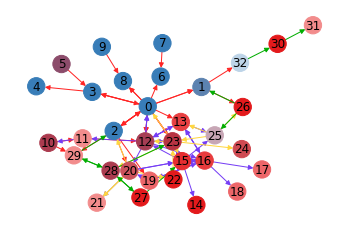

In [15]:
G = nx.MultiDiGraph()

G.add_nodes_from(families['family_id'], node_shape = 's')
G.add_weighted_edges_from(edgeList)
nx.draw_networkx_labels(G,loc)

nx.draw(G,loc, node_color = families['partisanship_color'], edge_color = EdgeDf['colour'])

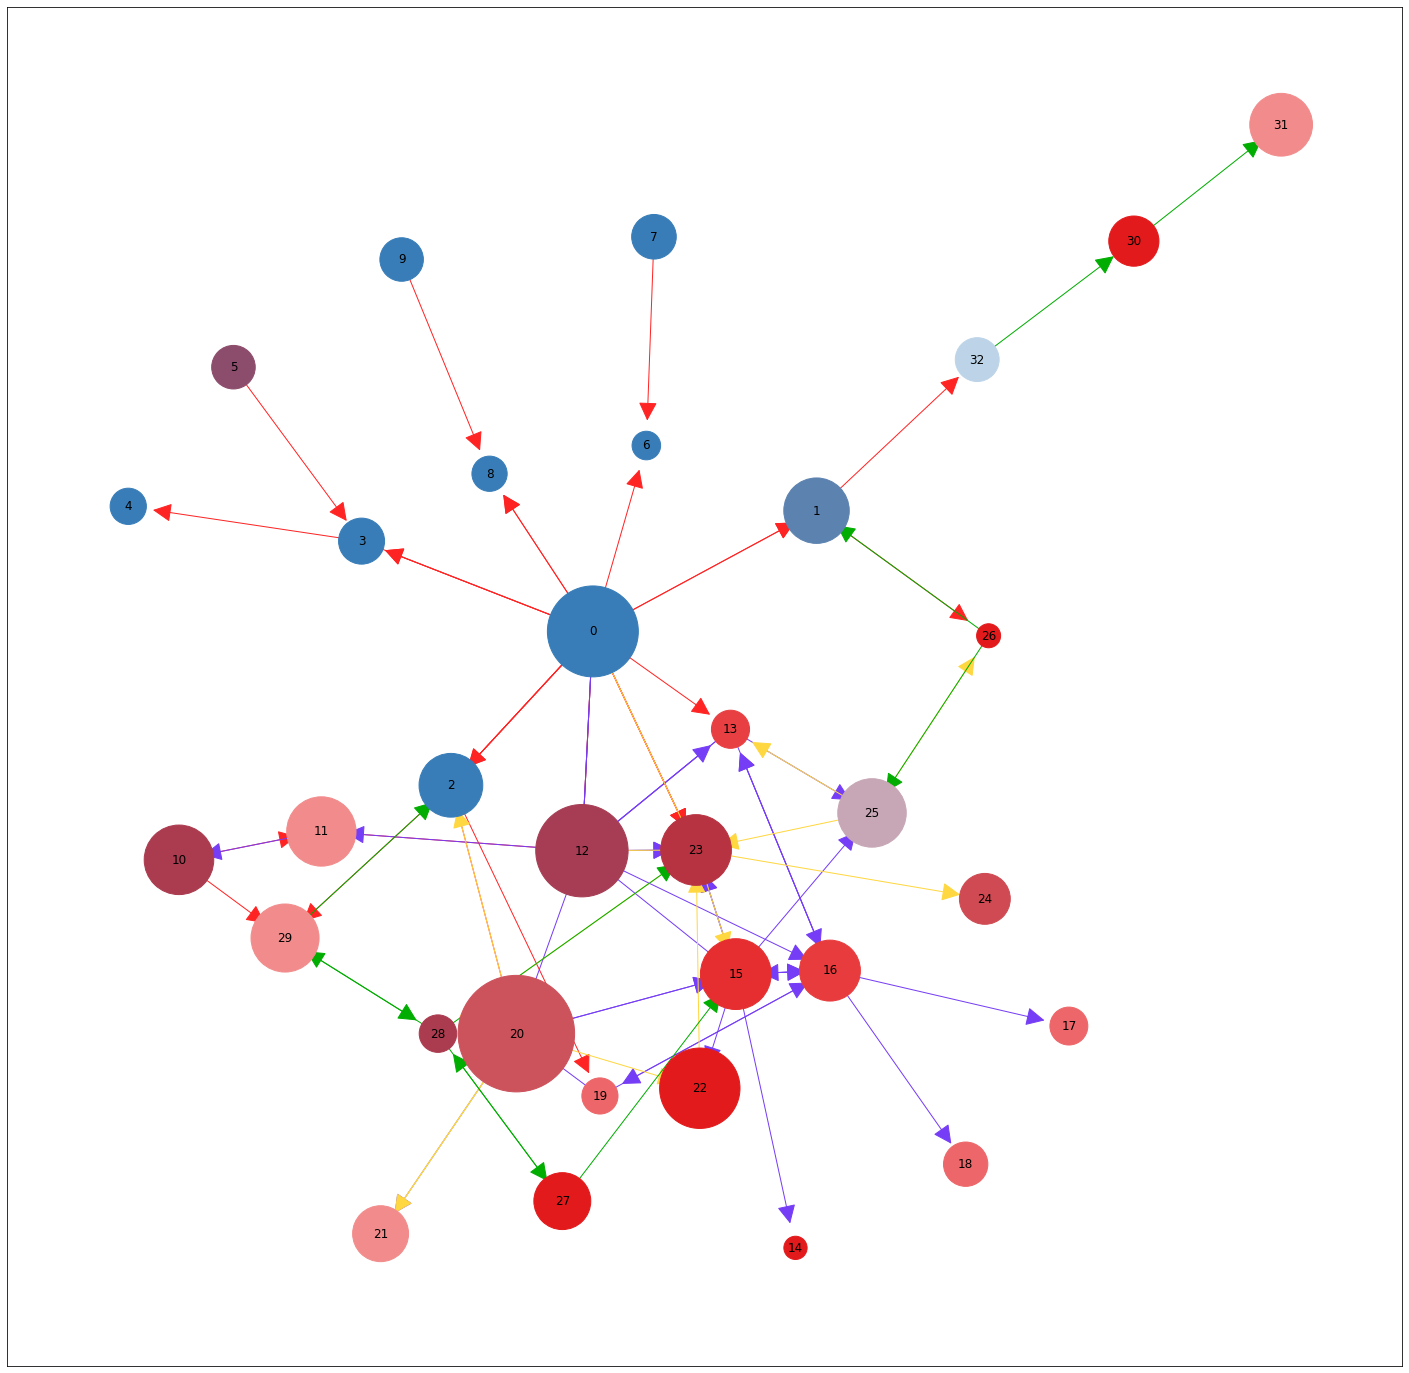

In [16]:
plt.figure(1,figsize = (25,25))

nx.draw_networkx_edges(G,loc, edge_color = EdgeDf['colour'],arrows = True, arrowsize = 40, min_target_margin = 25, connectionstyle = 'arc3')
nx.draw_networkx_nodes(G,loc, node_color = families['partisanship_color'], node_size = n_size, node_shape = 'o')
nx.draw_networkx_labels(G,loc)

plt.show()

In [17]:
print(nx.dijkstra_path(G,21,31))

[21, 20, 2, 0, 1, 32, 30, 31]


In [46]:
r = nx.pagerank(G)
r[0]

0.06096686486641996